# Simple Linear regression model on Salary data

To get started we will ensure that the required libraries are available:

In [1]:

%pip install pip --upgrade pip
%pip install numpy
%pip install pandas
%pip install scipy
%pip install scikit-learn --upgrade
%pip install --upgrade xgboost
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

Next we will import our various libraries. It may be necessary to add others as we run the notebook.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

pd.options.mode.copy_on_write = True # This will stop a warning when cleaning our data later in the notebook

## Import our data

We will now import the data from the CSV file. The column headings are in row 0.

In [4]:
df = pd.read_csv('ai_job_dataset_cleaned.csv', header = 0)

Let us see what the data looks like in the data frame.
To get an overall view of the data frame we ill use the various tools pandas gives us: head(), info(), describe() and shape:

In [5]:
df.head()

,years_experience,benefits_score,skill_AWS,skill_Azure,skill_Computer Vision,skill_Data Visualization,skill_Deep Learning,skill_Docker,skill_GCP,skill_Git,...,job_Machine Learning Engineer,job_Machine Learning Researcher,job_NLP Engineer,job_Principal Data Scientist,job_Research Scientist,Hub_Australasia,Hub_Europe,Hub_India,Hub_North America,Hub_UK
0,-0.956516,-1.591763,1,0,0,0,1,1,0,0,...,False,False,False,False,False,False,False,False,True,False
1,-0.778488,1.310179,0,0,0,0,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,0.111651,0.757428,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,False
3,0.111651,-1.108106,0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,-0.600460,-0.831731,0,0,0,0,0,1,0,0,...,False,False,False,True,False,False,False,False,False,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15202 entries, 0 to 15201
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   years_experience                 15202 non-null  float64
 1   benefits_score                   15202 non-null  float64
 2   skill_AWS                        15202 non-null  int64  
 3   skill_Azure                      15202 non-null  int64  
 4   skill_Computer Vision            15202 non-null  int64  
 5   skill_Data Visualization         15202 non-null  int64  
 6   skill_Deep Learning              15202 non-null  int64  
 7   skill_Docker                     15202 non-null  int64  
 8   skill_GCP                        15202 non-null  int64  
 9   skill_Git                        15202 non-null  int64  
 10  skill_Hadoop                     15202 non-null  int64  
 11  skill_Java                       15202 non-null  int64  
 12  skill_Kubernetes  

## Building the models

We could now create our 'X' and 'y' datasets, with 'salary_usd' being our prediction target:

We will start with a 80/20 split between training and testing data, and a random_state of 42 (From the hitchhikers guide to the galaxy)

In [7]:
from sklearn.model_selection import train_test_split
y = df['log_salary_usd']
X = df.drop(columns=['log_salary_usd'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12161, 51)
y_train shape: (12161,)
X_test shape: (3041, 51)
y_test shape: (3041,)


## Random forest regressor

In [8]:
print("Training Random Forest Model...")
start_time = time.time()

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"  MAE:  {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

Training Random Forest Model...
Training completed in 0.65 seconds

Random Forest Results:
  MAE:  0.2129
  RMSE: 0.2678
  R²:   0.7279


Lets look at feature importance:


Top 15 Most Important Features:
              feature  importance
0    years_experience    0.785400
48          Hub_India    0.147359
1      benefits_score    0.014353
11         skill_Java    0.001779
25   skill_TensorFlow    0.001679
16          skill_NLP    0.001660
20          skill_SQL    0.001619
18       skill_Python    0.001563
21        skill_Scala    0.001555
12   skill_Kubernetes    0.001518
28         remote_100    0.001509
13        skill_Linux    0.001507
17      skill_PyTorch    0.001489
26           remote_0    0.001488
15  skill_Mathematics    0.001441


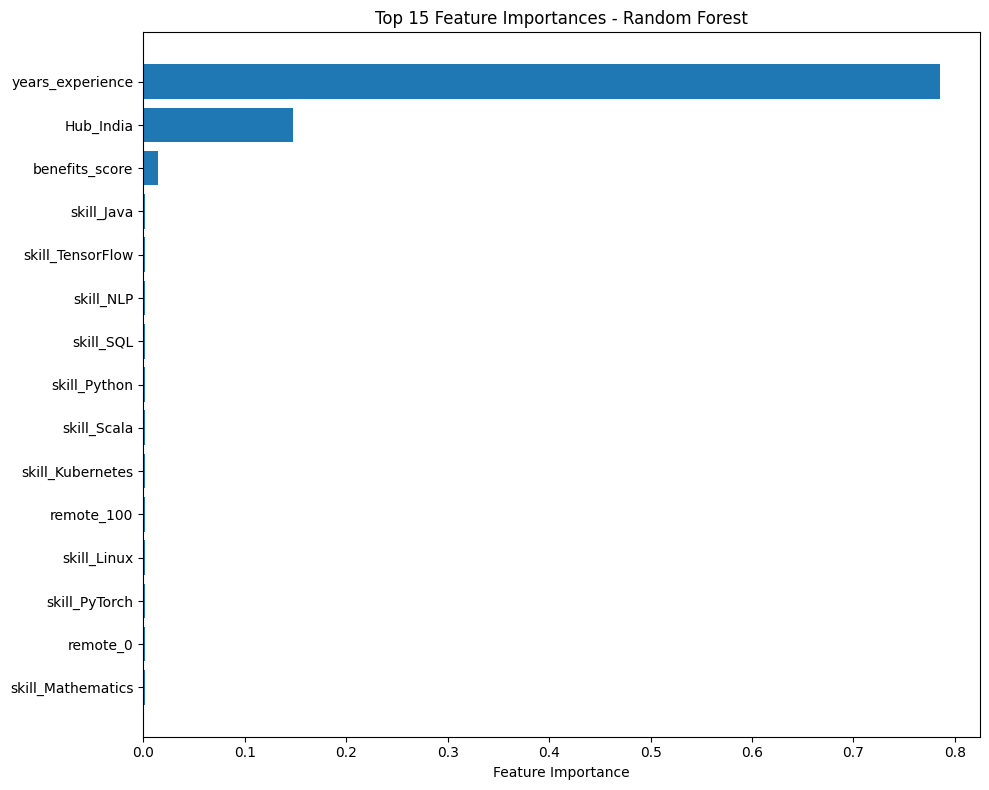

In [9]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

This suggests that as India has the cheapest labour force, this location heavily influences the results. However contracts such as UK public sector often geofence their cloud requiring workers to work from inside the same country as their company networks.

Lets try some hyperparameter tuning:

In [10]:
print("Performing hyperparameter tuning...")

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=50,                  # Number of parameter settings sampled
    cv=5,                       # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random.fit(X_train, y_train)

print(f"Best parameters: {rf_random.best_params_}")
print(f"Best cross-validation score: {rf_random.best_score_:.4f}")

best_rf_model = rf_random.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

rf_tuned_results = evaluate_model(y_test, y_pred_rf_tuned, "Random Forest (Tuned)")

Performing hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}
Best cross-validation score: -0.0693

Random Forest (Tuned) Results:
  MAE:  0.2120
  RMSE: 0.2658
  R²:   0.7320


Trying XGBoost:

In [11]:
from xgboost import XGBRegressor

print("Training XGBoost Model...")
start_time = time.time()

# Basic XGBoost model first
xgb_model = XGBRegressor(
    n_estimators=100,  # changing n_estimators to 1000 produced a worse result
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")

Training XGBoost Model...
Training completed in 0.11 seconds

XGBoost Results:
  MAE:  0.2161
  RMSE: 0.2737
  R²:   0.7159


Lets look at hyperparameter tuning


Top 15 Most Important Features (XGBoost):
                         feature  importance
0               years_experience    0.390807
48                     Hub_India    0.368281
40           job_ML Ops Engineer    0.006759
32      job_AI Software Engineer    0.006217
28                    remote_100    0.006030
16                     skill_NLP    0.005937
20                     skill_SQL    0.005651
33             job_AI Specialist    0.005594
24                 skill_Tableau    0.005447
25              skill_TensorFlow    0.005427
35              job_Data Analyst    0.005384
47                    Hub_Europe    0.005351
30        job_AI Product Manager    0.005334
15             skill_Mathematics    0.005254
44  job_Principal Data Scientist    0.005248


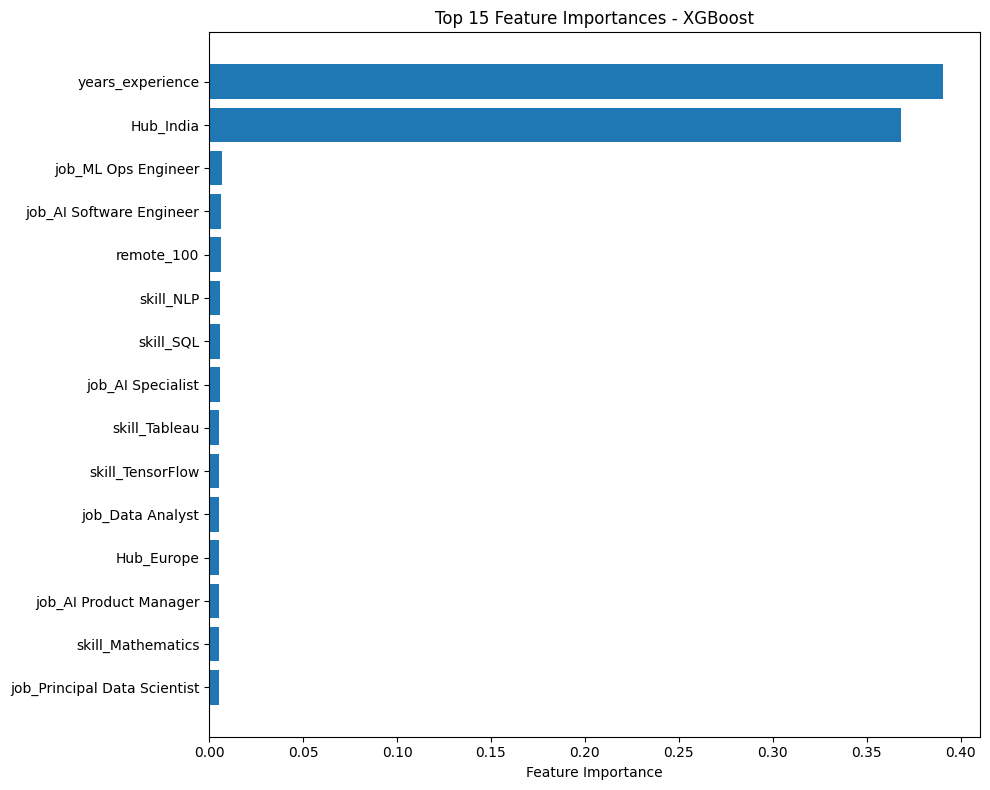

In [13]:
xgb_feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features (XGBoost):")
print(xgb_feature_importance.head(15))

# Plot XGBoost feature importance
plt.figure(figsize=(10, 8))
top_features_xgb = xgb_feature_importance.head(15)
plt.barh(top_features_xgb['feature'], top_features_xgb['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
print("Performing XGBoost hyperparameter tuning...")

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [25, 50, 100, 200, 300, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Use RandomizedSearchCV for faster tuning
xgb_random = RandomizedSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=xgb_param_grid,
    n_iter=100,                 # More iterations for better optimization
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_random.fit(X_train, y_train)

print(f"Best XGBoost parameters: {xgb_random.best_params_}")
print(f"Best cross-validation score: {xgb_random.best_score_:.4f}")

# Use the best XGBoost model
best_xgb_model = xgb_random.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

xgb_tuned_results = evaluate_model(y_test, y_pred_xgb_tuned, "XGBoost (Tuned)")

Performing XGBoost hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best XGBoost parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 25, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best cross-validation score: -0.0691

XGBoost (Tuned) Results:
  MAE:  0.2121
  RMSE: 0.2658
  R²:   0.7321


This code also splits the existing X_train and y_train into a smaller training set and a validation set.
It's used here to create a validation set for early stopping in XGBoost.

In [40]:
# XGBoost 3.0+ with callbacks approach
print("Training XGBoost with Callbacks (XGBoost 3.0+ recommended)...")

from xgboost.callback import EarlyStopping

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Create early stopping callback
early_stop_callback = EarlyStopping(
    rounds=30,          # Number of rounds to wait
    metric_name='rmse',  # Metric to monitor
    data_name='validation_0',  # Name of validation set
    save_best=True      # Save the best model
)

xgb_early_stop = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1,
    callbacks=[early_stop_callback]  # Add callback here
)

# Fit with validation set
xgb_early_stop.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=True
)

print(f"Training stopped at iteration: {xgb_early_stop.best_iteration}")
print(f"Best validation score: {xgb_early_stop.best_score:.4f}")

y_pred_xgb_early = xgb_early_stop.predict(X_test)
xgb_early_results = evaluate_model(y_test, y_pred_xgb_early, "XGBoost (Early Stopping)")

Training XGBoost with Callbacks (XGBoost 3.0+ recommended)...
[0]	validation_0-rmse:0.48059
[1]	validation_0-rmse:0.44797
[2]	validation_0-rmse:0.41986
[3]	validation_0-rmse:0.39550
[4]	validation_0-rmse:0.37475
[5]	validation_0-rmse:0.35726
[6]	validation_0-rmse:0.34231
[7]	validation_0-rmse:0.32959
[8]	validation_0-rmse:0.31915
[9]	validation_0-rmse:0.31043
[10]	validation_0-rmse:0.30322
[11]	validation_0-rmse:0.29728
[12]	validation_0-rmse:0.29242
[13]	validation_0-rmse:0.28852
[14]	validation_0-rmse:0.28528
[15]	validation_0-rmse:0.28265
[16]	validation_0-rmse:0.28053
[17]	validation_0-rmse:0.27884
[18]	validation_0-rmse:0.27740
[19]	validation_0-rmse:0.27634
[20]	validation_0-rmse:0.27551
[21]	validation_0-rmse:0.27477
[22]	validation_0-rmse:0.27416
[23]	validation_0-rmse:0.27371
[24]	validation_0-rmse:0.27337
[25]	validation_0-rmse:0.27311
[26]	validation_0-rmse:0.27295
[27]	validation_0-rmse:0.27292
[28]	validation_0-rmse:0.27285
[29]	validation_0-rmse:0.27282
[30]	validation_0-

Comparison:

In [41]:
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

# Create comparison DataFrame
comparison_data = {
    'Model': ['Random Forest (Tuned)', 'XGBoost (Default)', 'XGBoost (Tuned)', 'XGBoost (Early Stop)'],
    'MAE': [rf_tuned_results['MAE'], xgb_results['MAE'], xgb_tuned_results['MAE'], xgb_early_results['MAE']],
    'RMSE': [rf_tuned_results['RMSE'], xgb_results['RMSE'], xgb_tuned_results['RMSE'], xgb_early_results['RMSE']],
    'R²': [rf_tuned_results['R2'], xgb_results['R2'], xgb_tuned_results['R2'], xgb_early_results['R2']]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Find best model
best_model_idx = comparison_df['R²'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest performing model: {best_model}")


MODEL COMPARISON SUMMARY
                Model      MAE     RMSE       R²
Random Forest (Tuned) 0.212038 0.265835 0.731962
    XGBoost (Default) 0.216086 0.273700 0.715866
      XGBoost (Tuned) 0.212097 0.265754 0.732126
 XGBoost (Early Stop) 0.213013 0.268205 0.727162

Best performing model: XGBoost (Tuned)


In [43]:
# Convert predictions to actual salary scale for better interpretation
print("\n" + "="*60)
print("ACTUAL SALARY SCALE COMPARISON")
print("="*60)

# Convert log predictions back to actual salaries
y_test_actual = np.expm1(y_test)
y_pred_rf_actual = np.expm1(y_pred_rf_tuned)
y_pred_xgb_actual = np.expm1(y_pred_xgb_tuned)

print(f"True salary range: ${y_test_actual.min():,.0f} - ${y_test_actual.max():,.0f}")
print(f"Mean actual salary: ${y_test_actual.mean():,.0f}")

print(f"\nRandom Forest MAE: ${mean_absolute_error(y_test_actual, y_pred_rf_actual):,.0f}")
print(f"XGBoost MAE: ${mean_absolute_error(y_test_actual, y_pred_xgb_actual):,.0f}")

# Relative error percentages
rf_relative_error = (mean_absolute_error(y_test_actual, y_pred_rf_actual) / y_test_actual.mean()) * 100
xgb_relative_error = (mean_absolute_error(y_test_actual, y_pred_xgb_actual) / y_test_actual.mean()) * 100

print(f"\nRandom Forest Relative MAE: {rf_relative_error:.2f}%")
print(f"XGBoost Relative MAE: {xgb_relative_error:.2f}%")


ACTUAL SALARY SCALE COMPARISON
True salary range: $16,795 - $394,917
Mean actual salary: $125,424

Random Forest MAE: $26,024
XGBoost MAE: $26,006

Random Forest Relative MAE: 20.75%
XGBoost Relative MAE: 20.73%


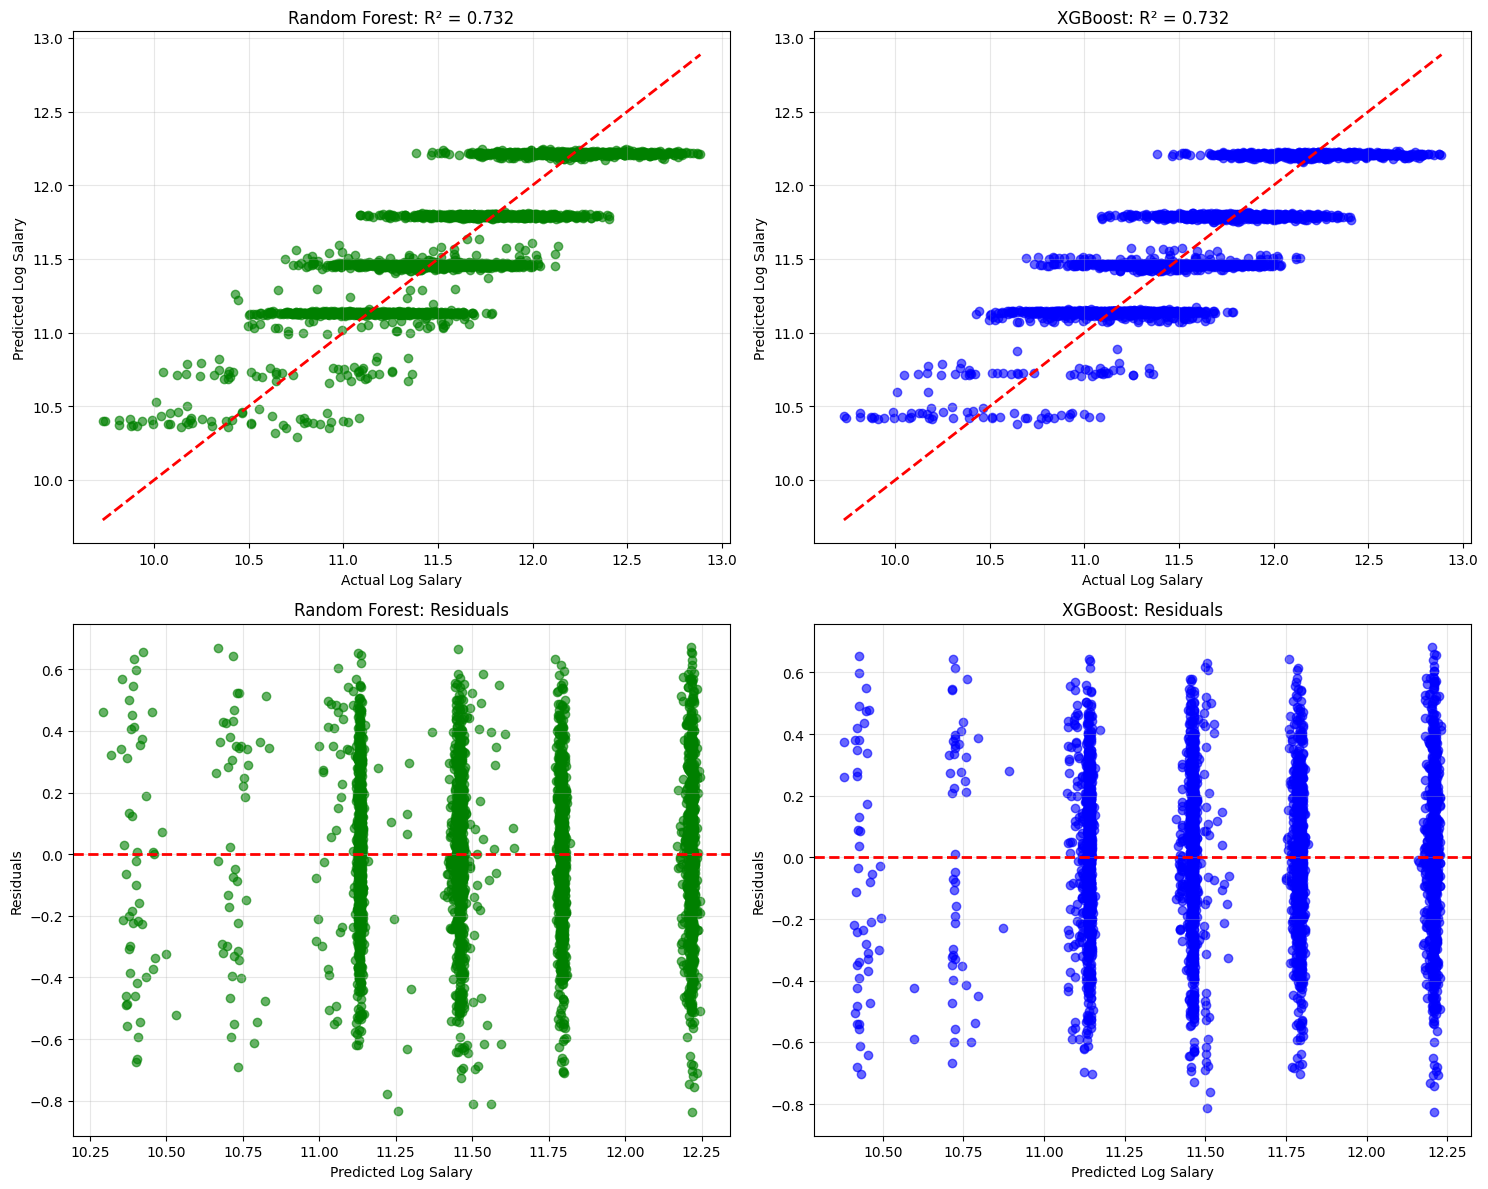

In [44]:
# Visualization: Model Performance Comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Random Forest: Predicted vs Actual
axes[0, 0].scatter(y_test, y_pred_rf_tuned, alpha=0.6, color='green')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Log Salary')
axes[0, 0].set_ylabel('Predicted Log Salary')
axes[0, 0].set_title(f'Random Forest: R² = {rf_tuned_results["R2"]:.3f}')
axes[0, 0].grid(True, alpha=0.3)

# XGBoost: Predicted vs Actual
axes[0, 1].scatter(y_test, y_pred_xgb_tuned, alpha=0.6, color='blue')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Log Salary')
axes[0, 1].set_ylabel('Predicted Log Salary')
axes[0, 1].set_title(f'XGBoost: R² = {xgb_tuned_results["R2"]:.3f}')
axes[0, 1].grid(True, alpha=0.3)

# Random Forest: Residuals
rf_residuals = y_test - y_pred_rf_tuned
axes[1, 0].scatter(y_pred_rf_tuned, rf_residuals, alpha=0.6, color='green')
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Log Salary')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Random Forest: Residuals')
axes[1, 0].grid(True, alpha=0.3)

# XGBoost: Residuals
xgb_residuals = y_test - y_pred_xgb_tuned
axes[1, 1].scatter(y_pred_xgb_tuned, xgb_residuals, alpha=0.6, color='blue')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Log Salary')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('XGBoost: Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Lets create some business insights:

## Export best model for use in streamlit app:

In [45]:
import joblib
import pickle
from datetime import datetime

# Save the best performing model
print("Saving the best XGBoost model...")

# Create a timestamp for the model version
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save using joblib (recommended for scikit-learn compatible models)
model_filename = f'xgboost_salary_model_{timestamp}.joblib'
joblib.dump(best_xgb_model, model_filename)
print(f"Model saved as: {model_filename}")

# Also save using pickle as backup
pickle_filename = f'xgboost_salary_model_{timestamp}.pkl'
with open(pickle_filename, 'wb') as f:
    pickle.dump(best_xgb_model, f)
print(f"Model also saved as: {pickle_filename}")

# Save model metadata
model_metadata = {
    'model_type': 'XGBRegressor',
    'best_params': best_xgb_model.get_params(),
    'performance_metrics': xgb_tuned_results,
    'training_date': datetime.now().isoformat(),
    'feature_names': list(X_train.columns),
    'target_variable': 'log_salary_usd',
    'model_version': timestamp
}

metadata_filename = f'model_metadata_{timestamp}.json'
import json
with open(metadata_filename, 'w') as f:
    json.dump(model_metadata, f, indent=2, default=str)
print(f"Model metadata saved as: {metadata_filename}")

Saving the best XGBoost model...
Model saved as: xgboost_salary_model_20250704_172503.joblib
Model also saved as: xgboost_salary_model_20250704_172503.pkl
Model metadata saved as: model_metadata_20250704_172503.json


Save the features for streamlit

In [46]:
# Save feature importance and column information
feature_info = {
    'feature_columns': list(X_train.columns),
    'feature_importance': dict(zip(X_train.columns, best_xgb_model.feature_importances_)),
    'expected_input_shape': X_train.shape[1],
    'categorical_columns': [col for col in X_train.columns if X_train[col].dtype == 'object'],
    'numerical_columns': [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
}

feature_info_filename = f'feature_info_{timestamp}.json'
with open(feature_info_filename, 'w') as f:
    json.dump(feature_info, f, indent=2, default=str)
print(f"Feature info saved as: {feature_info_filename}")

Feature info saved as: feature_info_20250704_172503.json
